# Решения практических заданий: Проверка статистических гипотез

Этот ноутбук содержит решения всех практических заданий из занятия по проверке статистических гипотез.

## Содержание:
1. **Задание 1**: Одновыборочный t-тест (время выполнения теста)
2. **Задание 2**: Двухвыборочный t-тест (сравнение методов тренировки)
3. **Задание 3**: Тест хи-квадрат (связь между полом и специальностью)
4. **Задание 4**: ANOVA (сравнение эффективности диет)

## Подготовка: Импорт библиотек

Импортируем все необходимые библиотеки для анализа данных.

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка для отображения графиков
sns.set_theme()
plt.style.use('default')

# Для воспроизводимости результатов
np.random.seed(42)

print("Библиотеки успешно импортированы!")

Библиотеки успешно импортированы!


---

## Задание 1: Одновыборочный t-тест

### Условие задачи:
Вам предоставлены данные о времени выполнения теста студентами. Предполагается, что среднее время выполнения теста составляет 45 минут.

Проведите одновыборочный t-тест, чтобы проверить это предположение:
1. Создайте выборку из 80 наблюдений со средним 47 минут и стандартным отклонением 5 минут
2. Сформулируйте нулевую и альтернативную гипотезы
3. Визуализируйте данные
4. Проведите t-тест
5. Сделайте выводы

### Формулировка гипотез:
- **H₀**: μ = 45 (среднее время выполнения теста равно 45 минутам)
- **H₁**: μ ≠ 45 (среднее время выполнения теста не равно 45 минутам)

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
Размер выборки: 80
Среднее время выполнения: 46.38 минут
Стандартное отклонение: 4.79 минут
Медиана: 46.37 минут
Минимум: 33.90 минут
Максимум: 56.26 минут


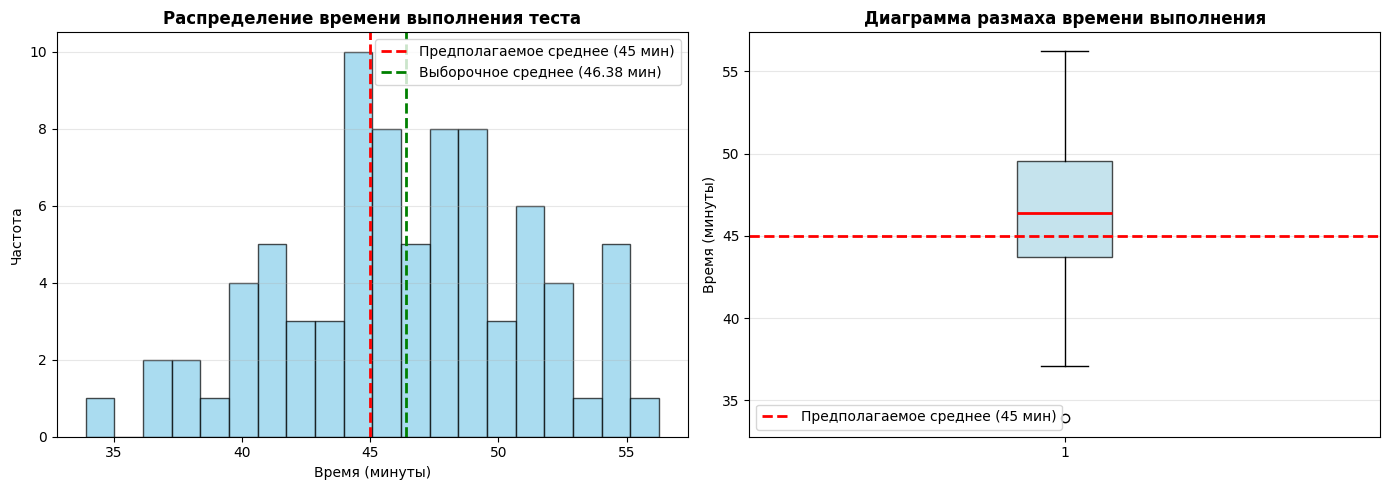


РЕЗУЛЬТАТЫ ОДНОВЫБОРОЧНОГО T-ТЕСТА
t-статистика: 2.5797
p-значение: 0.0117
Уровень значимости (α): 0.05

ВЫВОД
✓ p-значение (0.0117) < 0.05
✓ Отвергаем нулевую гипотезу H₀
✓ Среднее время выполнения теста (46.38 мин)
  статистически значимо отличается от 45 минут
✓ Разница составляет 1.38 минут


In [2]:
# Решение задания 1: Одновыборочный t-тест

# Шаг 1: Создание выборки
test_time = np.random.normal(loc=47, scale=5, size=80)

# Шаг 2: Описательная статистика
print("=" * 60)
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА")
print("=" * 60)
print(f"Размер выборки: {len(test_time)}")
print(f"Среднее время выполнения: {np.mean(test_time):.2f} минут")
print(f"Стандартное отклонение: {np.std(test_time, ddof=1):.2f} минут")
print(f"Медиана: {np.median(test_time):.2f} минут")
print(f"Минимум: {np.min(test_time):.2f} минут")
print(f"Максимум: {np.max(test_time):.2f} минут")

# Шаг 3: Визуализация данных
plt.figure(figsize=(14, 5))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(test_time, bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(45, color='red', linestyle='--', linewidth=2, label='Предполагаемое среднее (45 мин)')
plt.axvline(np.mean(test_time), color='green', linestyle='--', linewidth=2, label=f'Выборочное среднее ({np.mean(test_time):.2f} мин)')
plt.title('Распределение времени выполнения теста', fontsize=12, fontweight='bold')
plt.xlabel('Время (минуты)')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Диаграмма размаха (boxplot)
plt.subplot(1, 2, 2)
plt.boxplot(test_time, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.axhline(45, color='red', linestyle='--', linewidth=2, label='Предполагаемое среднее (45 мин)')
plt.title('Диаграмма размаха времени выполнения', fontsize=12, fontweight='bold')
plt.ylabel('Время (минуты)')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Шаг 4: Проведение одновыборочного t-теста
t_statistic, p_value = stats.ttest_1samp(test_time, 45)

print("\n" + "=" * 60)
print("РЕЗУЛЬТАТЫ ОДНОВЫБОРОЧНОГО T-ТЕСТА")
print("=" * 60)
print(f"t-статистика: {t_statistic:.4f}")
print(f"p-значение: {p_value:.4f}")
print(f"Уровень значимости (α): 0.05")

# Шаг 5: Интерпретация результатов
print("\n" + "=" * 60)
print("ВЫВОД")
print("=" * 60)
if p_value < 0.05:
    print(f"✓ p-значение ({p_value:.4f}) < 0.05")
    print("✓ Отвергаем нулевую гипотезу H₀")
    print(f"✓ Среднее время выполнения теста ({np.mean(test_time):.2f} мин)")
    print("  статистически значимо отличается от 45 минут")
    print(f"✓ Разница составляет {np.mean(test_time) - 45:.2f} минут")
else:
    print(f"✗ p-значение ({p_value:.4f}) >= 0.05")
    print("✗ Не отвергаем нулевую гипотезу H₀")
    print("✗ Нет статистически значимых различий между выборочным")
    print("  средним и предполагаемым значением 45 минут")
print("=" * 60)

---

## Задание 2: Двухвыборочный t-тест

### Условие задачи:
Проведите сравнительный анализ эффективности двух методов тренировки:

1. Создайте две выборки:
   - Группа 1: 40 спортсменов, тренирующихся по методу A (среднее время = 15 минут, станд. откл. = 3)
   - Группа 2: 40 спортсменов, тренирующихся по методу B (среднее время = 17 минут, станд. откл. = 3)

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте визуализации для сравнения групп
   - Проведите двухвыборочный t-тест
   - Сделайте выводы об эффективности методов тренировки

### Формулировка гипотез:
- **H₀**: μ₁ = μ₂ (среднее время тренировки по методу A равно методу B)
- **H₁**: μ₁ ≠ μ₂ (среднее время тренировки по методам различается)

ОПИСАТЕЛЬНАЯ СТАТИСТИКА

Метод A:
  Размер выборки: 40
  Среднее время: 15.03 минут
  Стандартное отклонение: 2.59 минут
  Медиана: 14.91 минут

Метод B:
  Размер выборки: 40
  Среднее время: 16.90 минут
  Стандартное отклонение: 2.94 минут
  Медиана: 17.62 минут

Разница средних: 1.87 минут


1

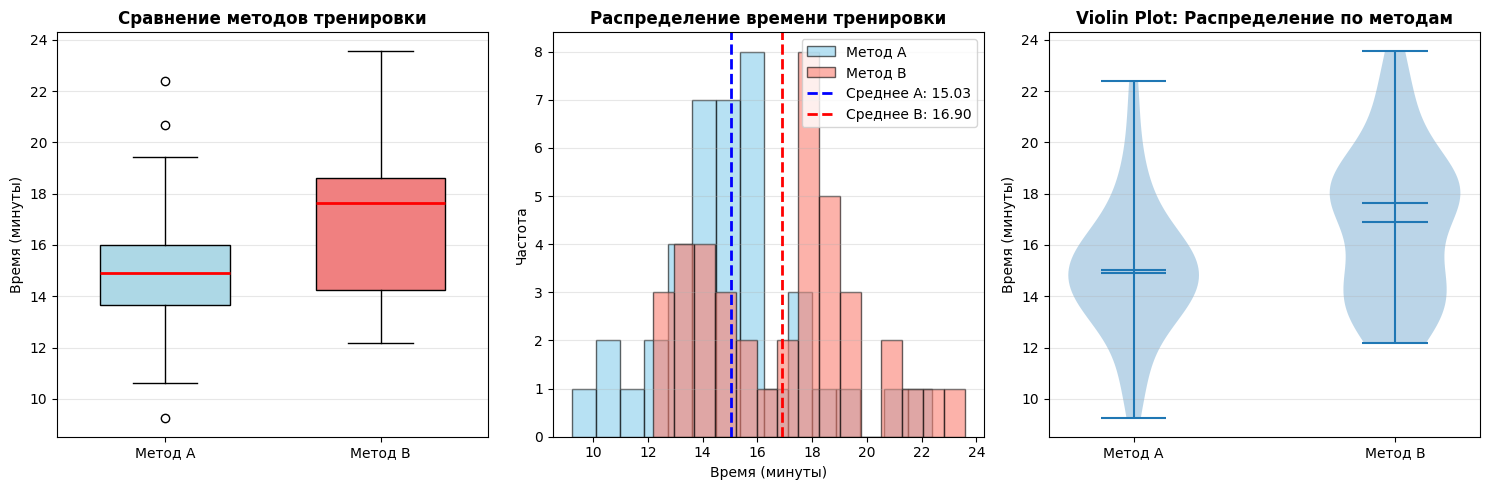


ПРОВЕРКА РАВЕНСТВА ДИСПЕРСИЙ (Тест Левена)
Статистика Левена: 1.7627
p-значение: 0.1882
✓ Дисперсии равны (можно использовать стандартный t-тест)

РЕЗУЛЬТАТЫ ДВУХВЫБОРОЧНОГО T-ТЕСТА
t-статистика: -3.0207
p-значение: 0.0034
Уровень значимости (α): 0.05
Размер эффекта (Cohen's d): 0.6755

ВЫВОД
✓ p-значение (0.0034) < 0.05
✓ Отвергаем нулевую гипотезу H₀
✓ Есть статистически значимые различия между методами
✓ Метод A эффективнее (быстрее на 1.87 мин)

Размер эффекта (Cohen's d = 0.6755):
  → Большой эффект


In [3]:
# Решение задания 2: Двухвыборочный t-тест

# Шаг 1: Создание выборок
method_a = np.random.normal(loc=15, scale=3, size=40)
method_b = np.random.normal(loc=17, scale=3, size=40)

# Шаг 2: Описательная статистика
print("=" * 60)
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА")
print("=" * 60)
print("\nМетод A:")
print(f"  Размер выборки: {len(method_a)}")
print(f"  Среднее время: {np.mean(method_a):.2f} минут")
print(f"  Стандартное отклонение: {np.std(method_a, ddof=1):.2f} минут")
print(f"  Медиана: {np.median(method_a):.2f} минут")

print("\nМетод B:")
print(f"  Размер выборки: {len(method_b)}")
print(f"  Среднее время: {np.mean(method_b):.2f} минут")
print(f"  Стандартное отклонение: {np.std(method_b, ddof=1):.2f} минут")
print(f"  Медиана: {np.median(method_b):.2f} минут")

print(f"\nРазница средних: {np.mean(method_b) - np.mean(method_a):.2f} минут")

# Шаг 3: Визуализация
plt.figure(figsize=(15, 5))

# Диаграмма размаха (boxplot)
plt.subplot(1, 3, 1)
bp = plt.boxplot([method_a, method_b], labels=['Метод A', 'Метод B'],
                  patch_artist=True, widths=0.6)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
for median in bp['medians']:
    median.set_color('red')
    median.set_linewidth(2)
plt.title('Сравнение методов тренировки', fontsize=12, fontweight='bold')
plt.ylabel('Время (минуты)')
plt.grid(axis='y', alpha=0.3)

# Гистограммы
plt.subplot(1, 3, 2)
plt.hist(method_a, alpha=0.6, label='Метод A', bins=15, color='skyblue', edgecolor='black')
plt.hist(method_b, alpha=0.6, label='Метод B', bins=15, color='salmon', edgecolor='black')
plt.axvline(np.mean(method_a), color='blue', linestyle='--', linewidth=2, label=f'Среднее A: {np.mean(method_a):.2f}')
plt.axvline(np.mean(method_b), color='red', linestyle='--', linewidth=2, label=f'Среднее B: {np.mean(method_b):.2f}')
plt.title('Распределение времени тренировки', fontsize=12, fontweight='bold')
plt.xlabel('Время (минуты)')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Violin plot
plt.subplot(1, 3, 3)
data_df = pd.DataFrame({
    'Время': np.concatenate([method_a, method_b]),
    'Метод': ['A'] * len(method_a) + ['B'] * len(method_b)
})
parts = plt.violinplot([method_a, method_b], positions=[1, 2], showmeans=True, showmedians=True)
plt.xticks([1, 2], ['Метод A', 'Метод B'])
plt.title('Violin Plot: Распределение по методам', fontsize=12, fontweight='bold')
plt.ylabel('Время (минуты)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Шаг 4: Проверка равенства дисперсий (тест Левена)
levene_statistic, levene_p = stats.levene(method_a, method_b)
print("\n" + "=" * 60)
print("ПРОВЕРКА РАВЕНСТВА ДИСПЕРСИЙ (Тест Левена)")
print("=" * 60)
print(f"Статистика Левена: {levene_statistic:.4f}")
print(f"p-значение: {levene_p:.4f}")
if levene_p > 0.05:
    print("✓ Дисперсии равны (можно использовать стандартный t-тест)")
    equal_var = True
else:
    print("✗ Дисперсии не равны (используем тест Уэлча)")
    equal_var = False

# Шаг 5: Проведение двухвыборочного t-теста
t_statistic, p_value = stats.ttest_ind(method_a, method_b, equal_var=equal_var)

print("\n" + "=" * 60)
print("РЕЗУЛЬТАТЫ ДВУХВЫБОРОЧНОГО T-ТЕСТА")
print("=" * 60)
print(f"t-статистика: {t_statistic:.4f}")
print(f"p-значение: {p_value:.4f}")
print(f"Уровень значимости (α): 0.05")

# Расчет размера эффекта (Cohen's d)
pooled_std = np.sqrt(((len(method_a) - 1) * np.var(method_a, ddof=1) + 
                       (len(method_b) - 1) * np.var(method_b, ddof=1)) / 
                      (len(method_a) + len(method_b) - 2))
cohens_d = (np.mean(method_b) - np.mean(method_a)) / pooled_std
print(f"Размер эффекта (Cohen's d): {cohens_d:.4f}")

# Шаг 6: Интерпретация результатов
print("\n" + "=" * 60)
print("ВЫВОД")
print("=" * 60)
if p_value < 0.05:
    print(f"✓ p-значение ({p_value:.4f}) < 0.05")
    print("✓ Отвергаем нулевую гипотезу H₀")
    print("✓ Есть статистически значимые различия между методами")
    if np.mean(method_a) < np.mean(method_b):
        print(f"✓ Метод A эффективнее (быстрее на {np.mean(method_b) - np.mean(method_a):.2f} мин)")
    else:
        print(f"✓ Метод B эффективнее (быстрее на {np.mean(method_a) - np.mean(method_b):.2f} мин)")
else:
    print(f"✗ p-значение ({p_value:.4f}) >= 0.05")
    print("✗ Не отвергаем нулевую гипотезу H₀")
    print("✗ Нет статистически значимых различий между методами")

# Интерпретация размера эффекта
print(f"\nРазмер эффекта (Cohen's d = {cohens_d:.4f}):")
if abs(cohens_d) < 0.2:
    print("  → Малый эффект")
elif abs(cohens_d) < 0.5:
    print("  → Средний эффект")
else:
    print("  → Большой эффект")
print("=" * 60)

---

## Задание 3: Тест хи-квадрат

### Условие задачи:
Проведите анализ связи между полом студентов и их выбором специальности:

1. Создайте данные:
   - 100 студентов
   - Пол: 'М' или 'Ж'
   - Специальность: 'Информатика', 'Биология', 'Физика'

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте таблицу сопряженности
   - Визуализируйте данные с помощью тепловой карты
   - Проведите тест хи-квадрат
   - Интерпретируйте результаты

### Формулировка гипотез:
- **H₀**: Нет связи между полом студентов и выбором специальности
- **H₁**: Существует связь между полом студентов и выбором специальности

ТАБЛИЦА СОПРЯЖЕННОСТИ
Специальность  Биология  Информатика  Физика  All
Пол                                              
Ж                    20           16      20   56
М                     5           25      14   44
All                  25           41      34  100


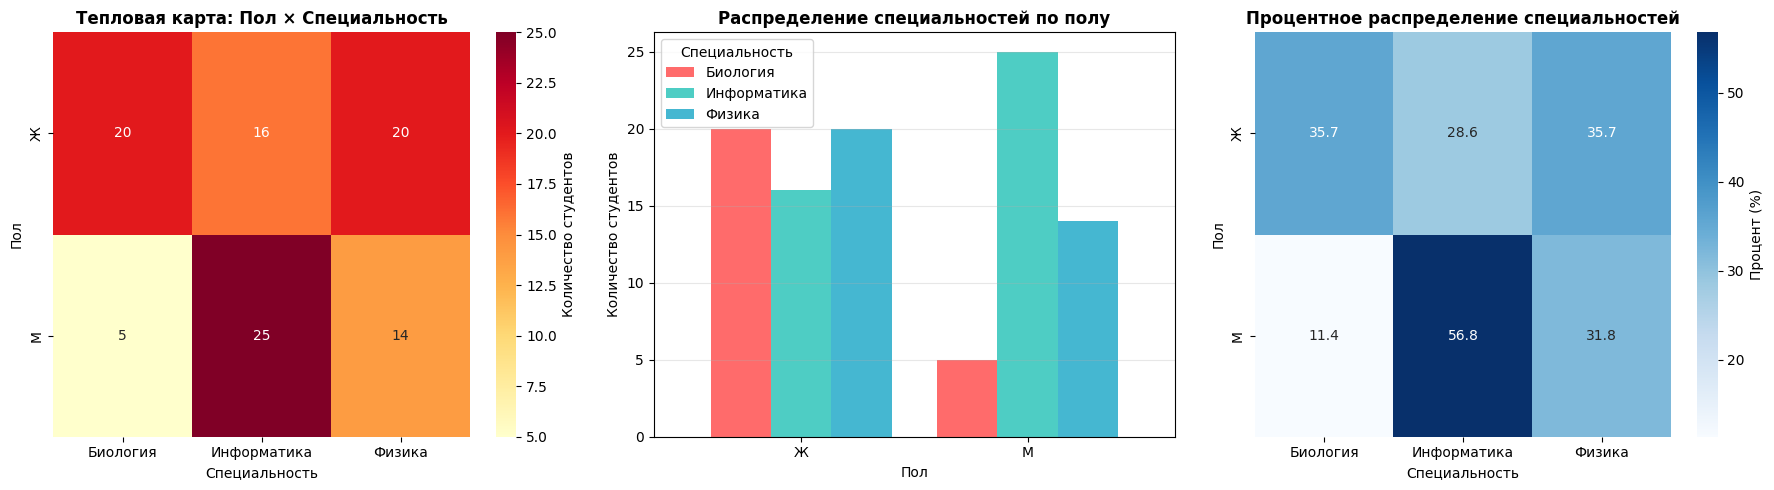


ОЖИДАЕМЫЕ ЧАСТОТЫ
Специальность  Биология  Информатика  Физика
Пол                                         
Ж                  14.0        22.96   19.04
М                  11.0        18.04   14.96

РЕЗУЛЬТАТЫ ТЕСТА ХИ-КВАДРАТ
Статистика хи-квадрат: 10.7492
p-значение: 0.0046
Степени свободы: 2
Уровень значимости (α): 0.05
Коэффициент Крамера V: 0.3279

СТАНДАРТИЗИРОВАННЫЕ ОСТАТКИ
Специальность  Биология  Информатика  Физика
Пол                                         
Ж                  1.60        -1.45    0.22
М                 -1.81         1.64   -0.25

Значения > |2| указывают на значимые отклонения от ожидаемых

ВЫВОД
✓ p-значение (0.0046) < 0.05
✓ Отвергаем нулевую гипотезу H₀
✓ Существует статистически значимая связь между
  полом студентов и выбором специальности

Наибольшие отклонения от ожидаемых значений:
  → М - Биология: остаток = -1.81

Сила связи (Крамера V = 0.3279):
  → Средняя связь


In [4]:
# Решение задания 3: Тест хи-квадрат

# Шаг 1: Создание данных
np.random.seed(42)
gender = np.random.choice(['М', 'Ж'], size=100)
# Создадим небольшую зависимость для интересного результата
specialty = []
for g in gender:
    if g == 'М':
        # Мужчины чаще выбирают информатику и физику
        specialty.append(np.random.choice(['Информатика', 'Биология', 'Физика'], 
                                         p=[0.5, 0.2, 0.3]))
    else:
        # Женщины более равномерно распределены
        specialty.append(np.random.choice(['Информатика', 'Биология', 'Физика'], 
                                         p=[0.3, 0.4, 0.3]))

# Шаг 2: Создание таблицы сопряженности
contingency_table = pd.crosstab(pd.Series(gender, name='Пол'),
                                pd.Series(specialty, name='Специальность'),
                                margins=True)

print("=" * 60)
print("ТАБЛИЦА СОПРЯЖЕННОСТИ")
print("=" * 60)
print(contingency_table)

# Таблица без итогов для теста
contingency_table_no_margins = pd.crosstab(pd.Series(gender, name='Пол'),
                                           pd.Series(specialty, name='Специальность'))

# Шаг 3: Визуализация данных
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Тепловая карта
sns.heatmap(contingency_table_no_margins, annot=True, fmt='d', cmap='YlOrRd', 
            ax=axes[0], cbar_kws={'label': 'Количество студентов'})
axes[0].set_title('Тепловая карта: Пол × Специальность', fontsize=12, fontweight='bold')

# Сгруппированная столбчатая диаграмма
contingency_table_no_margins.plot(kind='bar', ax=axes[1], width=0.8, 
                                   color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('Распределение специальностей по полу', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Пол')
axes[1].set_ylabel('Количество студентов')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='Специальность')
axes[1].grid(axis='y', alpha=0.3)

# Нормализованная тепловая карта (процентное соотношение)
contingency_normalized = contingency_table_no_margins.div(contingency_table_no_margins.sum(axis=1), axis=0) * 100
sns.heatmap(contingency_normalized, annot=True, fmt='.1f', cmap='Blues', 
            ax=axes[2], cbar_kws={'label': 'Процент (%)'})
axes[2].set_title('Процентное распределение специальностей', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Шаг 4: Проведение теста хи-квадрат
chi2, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table_no_margins)

print("\n" + "=" * 60)
print("ОЖИДАЕМЫЕ ЧАСТОТЫ")
print("=" * 60)
expected_df = pd.DataFrame(expected_freq, 
                          index=contingency_table_no_margins.index,
                          columns=contingency_table_no_margins.columns)
print(expected_df.round(2))

print("\n" + "=" * 60)
print("РЕЗУЛЬТАТЫ ТЕСТА ХИ-КВАДРАТ")
print("=" * 60)
print(f"Статистика хи-квадрат: {chi2:.4f}")
print(f"p-значение: {p_value:.4f}")
print(f"Степени свободы: {dof}")
print(f"Уровень значимости (α): 0.05")

# Расчет коэффициента сопряженности Крамера
n = contingency_table_no_margins.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table_no_margins.shape) - 1)))
print(f"Коэффициент Крамера V: {cramers_v:.4f}")

# Шаг 5: Анализ остатков
residuals = (contingency_table_no_margins - expected_df) / np.sqrt(expected_df)
print("\n" + "=" * 60)
print("СТАНДАРТИЗИРОВАННЫЕ ОСТАТКИ")
print("=" * 60)
print(residuals.round(2))
print("\nЗначения > |2| указывают на значимые отклонения от ожидаемых")

# Шаг 6: Интерпретация результатов
print("\n" + "=" * 60)
print("ВЫВОД")
print("=" * 60)
if p_value < 0.05:
    print(f"✓ p-значение ({p_value:.4f}) < 0.05")
    print("✓ Отвергаем нулевую гипотезу H₀")
    print("✓ Существует статистически значимая связь между")
    print("  полом студентов и выбором специальности")
    
    # Анализ, где наблюдаются наибольшие отклонения
    print("\nНаибольшие отклонения от ожидаемых значений:")
    abs_residuals = residuals.abs()
    max_pos = abs_residuals.stack().idxmax()
    print(f"  → {max_pos[0]} - {max_pos[1]}: остаток = {residuals.loc[max_pos]:.2f}")
    
else:
    print(f"✗ p-значение ({p_value:.4f}) >= 0.05")
    print("✗ Не отвергаем нулевую гипотезу H₀")
    print("✗ Нет статистически значимой связи между")
    print("  полом студентов и выбором специальности")

# Интерпретация силы связи
print(f"\nСила связи (Крамера V = {cramers_v:.4f}):")
if cramers_v < 0.1:
    print("  → Очень слабая связь")
elif cramers_v < 0.3:
    print("  → Слабая связь")
elif cramers_v < 0.5:
    print("  → Средняя связь")
else:
    print("  → Сильная связь")
print("=" * 60)

---

## Задание 4: Однофакторный дисперсионный анализ (ANOVA)

### Условие задачи:
Проведите сравнительный анализ эффективности трех различных диет:

1. Создайте данные для трех групп по 25 человек:
   - Диета А: среднее снижение веса 5 кг, станд. откл. = 1.5
   - Диета B: среднее снижение веса 6 кг, станд. откл. = 1.5
   - Диета C: среднее снижение веса 4 кг, станд. откл. = 1.5

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте визуализации для сравнения групп
   - Проведите однофакторный дисперсионный анализ
   - Сделайте выводы об эффективности диет

### Формулировка гипотез:
- **H₀**: μ₁ = μ₂ = μ₃ (средние показатели снижения веса одинаковы для всех диет)
- **H₁**: Хотя бы одна диета имеет отличное среднее значение снижения веса

ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО ГРУППАМ

Диета A:
  Размер выборки: 25
  Среднее снижение веса: 4.75 кг
  Стандартное отклонение: 1.43 кг
  Медиана: 4.65 кг
  Минимум: 2.13 кг
  Максимум: 7.37 кг

Диета B:
  Размер выборки: 25
  Среднее снижение веса: 5.57 кг
  Стандартное отклонение: 1.39 кг
  Медиана: 5.56 кг
  Минимум: 3.06 кг
  Максимум: 8.78 кг

Диета C:
  Размер выборки: 25
  Среднее снижение веса: 4.16 кг
  Стандартное отклонение: 1.48 кг
  Медиана: 4.49 кг
  Минимум: 0.07 кг
  Максимум: 6.35 кг

Общая статистика (все диеты):
  Общий размер: 75
  Общее среднее: 4.83 кг
  Общее станд. откл.: 1.53 кг


C:\Users\Helltaker\AppData\Local\Temp\ipykernel_16404\19073916.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(diets, labels=diet_names, patch_artist=True, widths=0.6)


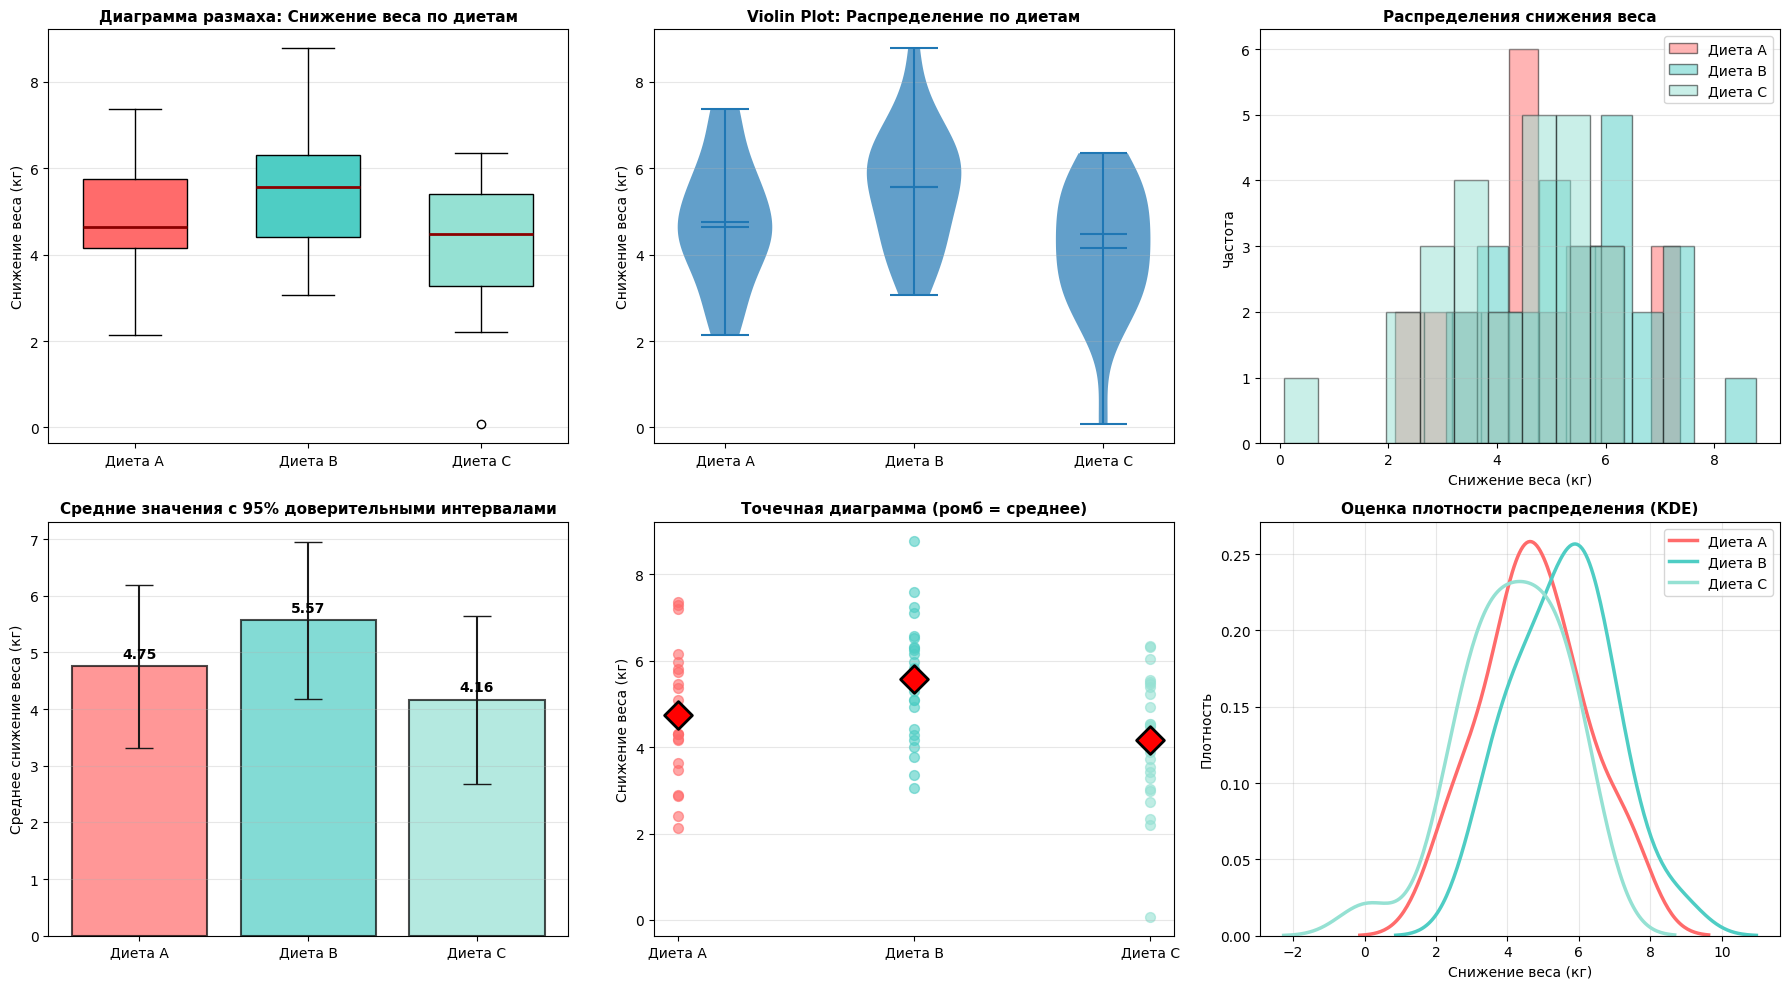


ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ (Тест Shapiro-Wilk)
Диета A: статистика = 0.9696, p-значение = 0.6353 ✓ Нормально распределено
Диета B: статистика = 0.9850, p-значение = 0.9635 ✓ Нормально распределено
Диета C: статистика = 0.9549, p-значение = 0.3222 ✓ Нормально распределено

ПРОВЕРКА РАВЕНСТВА ДИСПЕРСИЙ (Тест Левена)
Статистика Левена: 0.0403
p-значение: 0.9605
✓ Дисперсии равны (предположение ANOVA выполнено)

РЕЗУЛЬТАТЫ ОДНОФАКТОРНОГО ДИСПЕРСИОННОГО АНАЛИЗА (ANOVA)
F-статистика: 6.0789
p-значение: 0.0036
Уровень значимости (α): 0.05
Размер эффекта (η²): 0.1445

ВЫВОД
✓ p-значение (0.0036) < 0.05
✓ Отвергаем нулевую гипотезу H₀
✓ Есть статистически значимые различия между диетами

✓ Самая эффективная: Диета B
  (среднее снижение: 5.57 кг)
✓ Наименее эффективная: Диета C
  (среднее снижение: 4.16 кг)

POST-HOC АНАЛИЗ: Парные сравнения (t-тесты с поправкой Бонферрони)
Скорректированный уровень значимости: 0.0167

Диета A vs Диета B:
  t-статистика: -2.0387, p-значение: 0.0470 ✗ Н

In [5]:
# Решение задания 4: Однофакторный дисперсионный анализ (ANOVA)

# Шаг 1: Создание данных
np.random.seed(42)
diet_a = np.random.normal(loc=5, scale=1.5, size=25)
diet_b = np.random.normal(loc=6, scale=1.5, size=25)
diet_c = np.random.normal(loc=4, scale=1.5, size=25)

diets = [diet_a, diet_b, diet_c]
diet_names = ['Диета A', 'Диета B', 'Диета C']

# Шаг 2: Описательная статистика
print("=" * 60)
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО ГРУППАМ")
print("=" * 60)
for name, diet in zip(diet_names, diets):
    print(f"\n{name}:")
    print(f"  Размер выборки: {len(diet)}")
    print(f"  Среднее снижение веса: {np.mean(diet):.2f} кг")
    print(f"  Стандартное отклонение: {np.std(diet, ddof=1):.2f} кг")
    print(f"  Медиана: {np.median(diet):.2f} кг")
    print(f"  Минимум: {np.min(diet):.2f} кг")
    print(f"  Максимум: {np.max(diet):.2f} кг")

# Общая статистика
all_data = np.concatenate(diets)
print(f"\nОбщая статистика (все диеты):")
print(f"  Общий размер: {len(all_data)}")
print(f"  Общее среднее: {np.mean(all_data):.2f} кг")
print(f"  Общее станд. откл.: {np.std(all_data, ddof=1):.2f} кг")

# Шаг 3: Визуализация
fig = plt.figure(figsize=(18, 10))

# Диаграмма размаха (boxplot)
ax1 = plt.subplot(2, 3, 1)
bp = plt.boxplot(diets, labels=diet_names, patch_artist=True, widths=0.6)
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set_color('darkred')
    median.set_linewidth(2)
plt.title('Диаграмма размаха: Снижение веса по диетам', fontsize=11, fontweight='bold')
plt.ylabel('Снижение веса (кг)')
plt.grid(axis='y', alpha=0.3)

# Violin plot
ax2 = plt.subplot(2, 3, 2)
parts = plt.violinplot(diets, positions=[1, 2, 3], showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
plt.xticks([1, 2, 3], diet_names)
plt.title('Violin Plot: Распределение по диетам', fontsize=11, fontweight='bold')
plt.ylabel('Снижение веса (кг)')
plt.grid(axis='y', alpha=0.3)

# Гистограммы с наложением
ax3 = plt.subplot(2, 3, 3)
for diet, name, color in zip(diets, diet_names, colors):
    plt.hist(diet, alpha=0.5, label=name, bins=10, color=color, edgecolor='black')
plt.title('Распределения снижения веса', fontsize=11, fontweight='bold')
plt.xlabel('Снижение веса (кг)')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Столбчатая диаграмма средних
ax4 = plt.subplot(2, 3, 4)
means = [np.mean(diet) for diet in diets]
stds = [np.std(diet, ddof=1) for diet in diets]
bars = plt.bar(diet_names, means, yerr=stds, capsize=10, color=colors, 
               edgecolor='black', linewidth=1.5, alpha=0.7)
plt.title('Средние значения с 95% доверительными интервалами', fontsize=11, fontweight='bold')
plt.ylabel('Среднее снижение веса (кг)')
plt.grid(axis='y', alpha=0.3)
# Добавление значений на столбцы
for i, (bar, mean) in enumerate(zip(bars, means)):
    plt.text(bar.get_x() + bar.get_width()/2, mean + 0.1, f'{mean:.2f}', 
             ha='center', va='bottom', fontweight='bold')

# Точечная диаграмма (strip plot)
ax5 = plt.subplot(2, 3, 5)
for i, (diet, name, color) in enumerate(zip(diets, diet_names, colors)):
    plt.scatter([i+1]*len(diet), diet, alpha=0.6, s=50, color=color, label=name)
    plt.scatter(i+1, np.mean(diet), color='red', s=200, marker='D', 
                edgecolor='black', linewidth=2, zorder=5)
plt.xticks([1, 2, 3], diet_names)
plt.title('Точечная диаграмма (ромб = среднее)', fontsize=11, fontweight='bold')
plt.ylabel('Снижение веса (кг)')
plt.grid(axis='y', alpha=0.3)

# KDE (Kernel Density Estimation)
ax6 = plt.subplot(2, 3, 6)
for diet, name, color in zip(diets, diet_names, colors):
    sns.kdeplot(data=diet, label=name, linewidth=2.5, color=color)
plt.title('Оценка плотности распределения (KDE)', fontsize=11, fontweight='bold')
plt.xlabel('Снижение веса (кг)')
plt.ylabel('Плотность')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Шаг 4: Проверка предположений ANOVA

# 4.1 Тест на нормальность (Shapiro-Wilk)
print("\n" + "=" * 60)
print("ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ (Тест Shapiro-Wilk)")
print("=" * 60)
for name, diet in zip(diet_names, diets):
    stat, p = stats.shapiro(diet)
    print(f"{name}: статистика = {stat:.4f}, p-значение = {p:.4f}", end="")
    if p > 0.05:
        print(" ✓ Нормально распределено")
    else:
        print(" ✗ Не нормально распределено")

# 4.2 Тест на равенство дисперсий (Levene)
print("\n" + "=" * 60)
print("ПРОВЕРКА РАВЕНСТВА ДИСПЕРСИЙ (Тест Левена)")
print("=" * 60)
levene_stat, levene_p = stats.levene(diet_a, diet_b, diet_c)
print(f"Статистика Левена: {levene_stat:.4f}")
print(f"p-значение: {levene_p:.4f}")
if levene_p > 0.05:
    print("✓ Дисперсии равны (предположение ANOVA выполнено)")
else:
    print("✗ Дисперсии не равны (возможно, стоит использовать тест Краскела-Уоллиса)")

# Шаг 5: Проведение однофакторного ANOVA
f_statistic, p_value = stats.f_oneway(diet_a, diet_b, diet_c)

print("\n" + "=" * 60)
print("РЕЗУЛЬТАТЫ ОДНОФАКТОРНОГО ДИСПЕРСИОННОГО АНАЛИЗА (ANOVA)")
print("=" * 60)
print(f"F-статистика: {f_statistic:.4f}")
print(f"p-значение: {p_value:.4f}")
print(f"Уровень значимости (α): 0.05")

# Расчет размера эффекта (eta-squared)
ss_between = sum([len(diet) * (np.mean(diet) - np.mean(all_data))**2 for diet in diets])
ss_total = sum([(x - np.mean(all_data))**2 for x in all_data])
eta_squared = ss_between / ss_total
print(f"Размер эффекта (η²): {eta_squared:.4f}")

# Шаг 6: Интерпретация результатов
print("\n" + "=" * 60)
print("ВЫВОД")
print("=" * 60)
if p_value < 0.05:
    print(f"✓ p-значение ({p_value:.4f}) < 0.05")
    print("✓ Отвергаем нулевую гипотезу H₀")
    print("✓ Есть статистически значимые различия между диетами")
    
    # Определение самой эффективной диеты
    best_diet_idx = np.argmax([np.mean(diet) for diet in diets])
    worst_diet_idx = np.argmin([np.mean(diet) for diet in diets])
    print(f"\n✓ Самая эффективная: {diet_names[best_diet_idx]}")
    print(f"  (среднее снижение: {np.mean(diets[best_diet_idx]):.2f} кг)")
    print(f"✓ Наименее эффективная: {diet_names[worst_diet_idx]}")
    print(f"  (среднее снижение: {np.mean(diets[worst_diet_idx]):.2f} кг)")
    
    # Post-hoc анализ (парные сравнения)
    print("\n" + "=" * 60)
    print("POST-HOC АНАЛИЗ: Парные сравнения (t-тесты с поправкой Бонферрони)")
    print("=" * 60)
    alpha_bonferroni = 0.05 / 3  # Поправка Бонферрони для 3 сравнений
    print(f"Скорректированный уровень значимости: {alpha_bonferroni:.4f}\n")
    
    comparisons = [
        (diet_a, diet_b, 'Диета A vs Диета B'),
        (diet_a, diet_c, 'Диета A vs Диета C'),
        (diet_b, diet_c, 'Диета B vs Диета C')
    ]
    
    for diet1, diet2, label in comparisons:
        t_stat, p_val = stats.ttest_ind(diet1, diet2)
        print(f"{label}:")
        print(f"  t-статистика: {t_stat:.4f}, p-значение: {p_val:.4f}", end="")
        if p_val < alpha_bonferroni:
            print(f" ✓ Значимо различаются")
        else:
            print(f" ✗ Не различаются")
    
else:
    print(f"✗ p-значение ({p_value:.4f}) >= 0.05")
    print("✗ Не отвергаем нулевую гипотезу H₀")
    print("✗ Нет статистически значимых различий между диетами")
    print("✗ Все три диеты показывают сопоставимую эффективность")

# Интерпретация размера эффекта
print(f"\nРазмер эффекта (η² = {eta_squared:.4f}):")
if eta_squared < 0.01:
    print("  → Малый эффект")
elif eta_squared < 0.06:
    print("  → Средний эффект")
else:
    print("  → Большой эффект")
print("=" * 60)

---

## Заключение

### Что мы изучили в этом практикуме:

1. **Одновыборочный t-тест** — проверка, отличается ли среднее значение выборки от известного значения генеральной совокупности

2. **Двухвыборочный t-тест** — сравнение средних значений двух независимых групп

3. **Тест хи-квадрат** — анализ связи между категориальными переменными

4. **ANOVA** — сравнение средних значений трех и более групп

### Ключевые выводы:

✓ **Всегда визуализируйте данные** перед статистическим анализом  
✓ **Проверяйте предположения** тестов (нормальность, равенство дисперсий)  
✓ **Интерпретируйте p-значение** в контексте задачи  
✓ **Используйте размер эффекта** для оценки практической значимости  
✓ **Проводите post-hoc анализ** после ANOVA при необходимости  

### Дополнительные рекомендации:

- При малых выборках (n < 30) используйте непараметрические альтернативы
- Всегда указывайте уровень значимости α до проведения теста
- Помните: статистическая значимость ≠ практическая значимость
- Документируйте все шаги анализа для воспроизводимости результатов